In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import sklearn
from sklearn import tree
from math import log

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE

In [2]:
note = pd.read_json("data_4.txt")

In [3]:
note

,game,rank,gold,rerolls,units,player,move_freq,main_trait,level_one,level_two,level_three,rarity_one,rarity_two,rarity_three,rarity_four,rarity_five
1,VN1_3655815269,4,298,49,49,7863217,25,Set3_Celestial,1,7,0,2,2,1,2,1
2,VN1_3655805705,3,335,38,51,18250278,31,Battlecast,2,5,2,2,1,2,3,1
3,VN1_3655815278,3,235,59,45,14856370,50,Set3_Blademaster,0,5,2,3,1,1,2,0
4,VN1_3655815321,1,421,39,65,1812899,37,Sniper,1,9,0,1,1,1,4,3
5,VN1_3655806749,7,326,61,79,605012,43,DarkStar,3,4,2,2,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101996,VN1_3663238429,8,237,24,49,31084573,26,Set3_Brawler,1,8,0,2,2,2,2,1
101997,VN1_3663237119,2,398,35,80,60234352,16,Vanguard,1,8,1,3,3,1,1,2
101998,VN1_3663225418,3,347,73,59,58208651,27,Chrono,1,7,0,0,2,1,4,1
101999,VN1_3663226957,7,322,27,62,59616094,11,Set3_Mystic,1,5,1,0,1,3,3,0


In [ ]:
note["rank"]

note["gold"]

note["rerolls"]

note["units"]

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

note[['gold', 'rerolls', 'units', 'move_freq']] = scaler.fit_transform(note[['gold', 'rerolls', 'units', 'move_freq']])

#X = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait_encoded']]

X1 = note[['gold', 'rerolls', 'units', 'move_freq', 'main_trait']]
# labelencoder = LabelEncoder()
# note['main_trait_encoded'] = labelencoder.fit_transform(note['main_trait'])

X2 = note[['gold', 'rerolls', 'units', 'move_freq']]

X3 = note[['gold', 'rerolls', 'units']]


X1 = pd.get_dummies(X1)

X1 = X1.drop(columns=['main_trait_Vanguard'])

y = note[['rank']]

full_data

,VN1_3655815269,VN1_3657137082,VN1_3657182627,VN1_3658805638,VN1_3658828369,VN1_3658874031,VN1_3660115309,VN1_3660123356,VN1_3659306642,VN1_3660225999,...,VN1_3663217997,VN1_3663220959,VN1_3663229575,VN1_3663223335,VN1_3663222793,VN1_3663233206,VN1_3663221798,VN1_3663234262,VN1_3663227248,VN1_3663235495
7863217,"{'rank': '4', 'gold': 298, 'rerolls': 49, 'uni...","{'rank': '2', 'gold': 253, 'rerolls': 52, 'uni...","{'rank': '2', 'gold': 328, 'rerolls': 46, 'uni...","{'rank': '5', 'gold': 278, 'rerolls': 31, 'uni...","{'rank': '4', 'gold': 288, 'rerolls': 35, 'uni...","{'rank': '4', 'gold': 372, 'rerolls': 58, 'uni...","{'rank': '6', 'gold': 352, 'rerolls': 39, 'uni...","{'rank': '5', 'gold': 257, 'rerolls': 56, 'uni...","{'rank': '7', 'gold': 206, 'rerolls': 18, 'uni...","{'rank': '2', 'gold': 280, 'rerolls': 83, 'uni...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47414700,NaN,NaN,NaN,"{'rank': '4', 'gold': 315, 'rerolls': 27, 'uni...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18250278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59765213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59934182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24216082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'rank': '4', 'gold': 279, 'rerolls': 59, 'uni...",NaN,NaN,NaN,NaN
12553274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'rank': '2', 'gold': 411, 'rerolls': 48, 'uni...",NaN,NaN,NaN
9395161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'rank': '6', 'gold': 310, 'rerolls': 47, 'uni...",NaN,NaN
8777021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'rank': '7', 'gold': 227, 'rerolls': 7, 'unit...",NaN


In [18]:
move_freq = pd.read_json("move_freq.txt", orient = "index")

move_freq

,game,player,move_freq,rank
1,VN1_3655815269,7863217,25,4
2,VN1_3655805705,18250278,31,3
3,VN1_3655815278,14856370,50,3
4,VN1_3655815321,1812899,37,1
5,VN1_3655806749,605012,43,7
...,...,...,...,...
101996,VN1_3663237119,60234352,26,2
101997,VN1_3663225418,58208651,16,3
101998,VN1_3663226957,59616094,27,7
101999,VN1_3663227039,39900321,11,5


[-2.50323552e+01  2.79055376e+00 -1.19529558e+01  3.99730008e-02
 -1.74344239e-01 -1.33461433e-03 -1.84285521e-02 -1.05415962e-01
 -4.40522501e-02 -1.92277180e-02 -2.60494381e-01 -1.35971490e-02
  6.30085170e-01 -1.33293908e-01 -1.11775934e-01 -4.62725252e-02
 -2.80766272e-01 -1.81128381e-02 -3.26415653e-02 -1.86094399e-02
 -6.81954198e-02 -1.56353677e-02 -1.15236987e-01  2.71319536e-02
 -7.90562401e-02 -4.42161277e-02 -1.30371134e-02 -1.87265424e-01]
Feature: 0, Score: -25.03236
Feature: 1, Score: 2.79055
Feature: 2, Score: -11.95296
Feature: 3, Score: 0.03997
Feature: 4, Score: -0.17434
Feature: 5, Score: -0.00133
Feature: 6, Score: -0.01843
Feature: 7, Score: -0.10542
Feature: 8, Score: -0.04405
Feature: 9, Score: -0.01923
Feature: 10, Score: -0.26049
Feature: 11, Score: -0.01360
Feature: 12, Score: 0.63009
Feature: 13, Score: -0.13329
Feature: 14, Score: -0.11178
Feature: 15, Score: -0.04627
Feature: 16, Score: -0.28077
Feature: 17, Score: -0.01811
Feature: 18, Score: -0.03264
Feat

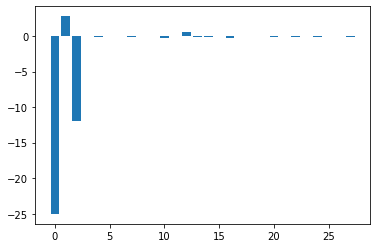

In [17]:
# define the model
model = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
# fit the model
model.fit(X1, y)

model2.fit(X2,y)

model3.fit(X3,y)
# get importance
importance = model.coef_

print(importance[0])

#summarize feature importance
for i,v in enumerate(importance[0]):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance[0]))], importance[0])
pyplot.show()

In [28]:
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

#------model1------------

# number of parameters
# num_params = len(model.coef_) + 1
num_params = 28 + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model.predict(X1)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)


#------model2------------
num_params = 4 + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model2.predict(X2)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)


#------model3------------
num_params = 3 + 1
print('Number of parameters: %d' % (num_params))
# predict the training set
yhat = model3.predict(X3)
# calculate the error
mse = mean_squared_error(y, yhat)
print('MSE: %.3f' % mse)
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)



Number of parameters: 29
MSE: 5.076
BIC: 166042.466
Number of parameters: 5
MSE: 5.078
BIC: 165799.262
Number of parameters: 4
MSE: 5.078
BIC: 165787.945


In [31]:
rfe = RFE(model, 28)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

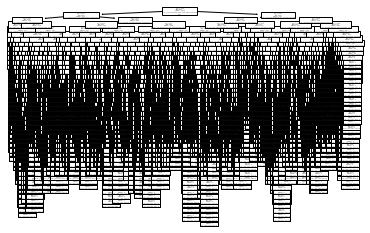

In [24]:
tree.plot_tree(model);